In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\hanna\\Documents\\GitHub\\CSE6242_Project\\data\\cleaned_movies_NEW.csv")

In [3]:
df.columns

Index(['budget', 'homepage', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'day_of_week_release', 'has_homepage',
       'num_spoken_languages', 'num_production_companies', 'num_genres',
       'genre_Horror', 'genre_War', 'genre_Adventure', 'genre_Western',
       'genre_Comedy', 'genre_Mystery', 'genre_Romance',
       'genre_Science_Fiction', 'genre_Action', 'genre_Thriller',
       'genre_Crime', 'genre_TV_Movie', 'genre_Animation', 'genre_Foreign',
       'genre_Fantasy', 'genre_Drama', 'genre_Documentary', 'genre_Family',
       'genre_Music', 'genre_History', 'keywords_list',
       'production_companies_list', 'production_countries_list', 'cast_size',
       'cast_member_list', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5',
       'cpi', 'revenue_adjusted', 'holiday_release', 'cast_1_vote_averag

In [5]:
y = df['revenue_adjusted']
X = df[['budget','runtime',
       'jan_release','feb_release','mar_release','apr_release','may_release',
       'jun_release','jul_release','aug_release','sep_release','oct_release',
       'nov_release','dec_release','sun_release','mon_release','tue_release',
       'wed_release','thur_release','fri_release','sat_release',
       'genre_Horror', 'genre_War',
       'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
       'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
       'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
       'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release', 'cast_1_vote_average',
       'cast_1_movie_count', 'cast_2_vote_average', 'cast_2_movie_count',
       'cast_3_vote_average', 'cast_3_movie_count', 'cast_4_vote_average',
       'cast_4_movie_count', 'cast_5_vote_average', 'cast_5_movie_count',
       'keywords_holiday_celebrate', 'keywords_violence_war_crime',
       'keywords_superhero', 'keywords_creditstinger_3d',
       'keywords_womandirector_independentfilm',
       'keywords_future_robots_aliens',
       'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
       'keywords_animal_nature']]
X = X.fillna(0)

cols = X.columns

scaler = MinMaxScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), columns=cols)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [6]:
# X_train.columns

In [7]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [8]:
feat_scores = fs.scores_
srted_feat_scores = sorted(feat_scores, reverse=True)
print(srted_feat_scores)

[1953.2775922703129, 390.0681086469689, 361.9932560998158, 239.71595854285795, 199.03904612284478, 120.35385588843134, 114.44523453731651, 114.29667133628253, 108.93146016372927, 106.29616941662823, 99.86285529218189, 97.63384421598826, 96.65897645178329, 95.15329070697915, 91.63027787557554, 90.6511416984356, 78.04532758332017, 70.55919496806237, 69.85824034226694, 68.16635641095999, 61.38852531916963, 60.15607316380474, 52.05767157748786, 49.619910903729235, 46.388061561423676, 44.47266487838774, 43.81568898608121, 32.09099319034964, 30.162531576889805, 28.665986411119466, 27.233212100184193, 23.71965889228614, 19.598668372944314, 18.77138349128632, 14.273442485388092, 14.189807079348446, 13.121020390851454, 12.611515660202727, 12.01394270396184, 11.347836496611526, 10.389008537164004, 10.284585396591755, 9.61950292647345, 9.588199881908098, 5.776765727441857, 4.879481365448715, 3.8564679336806242, 3.7015700726707284, 3.450472546762289, 3.1544467375199865, 2.9929292733795965, 2.88891

<Axes: xlabel='Score', ylabel='Feature'>

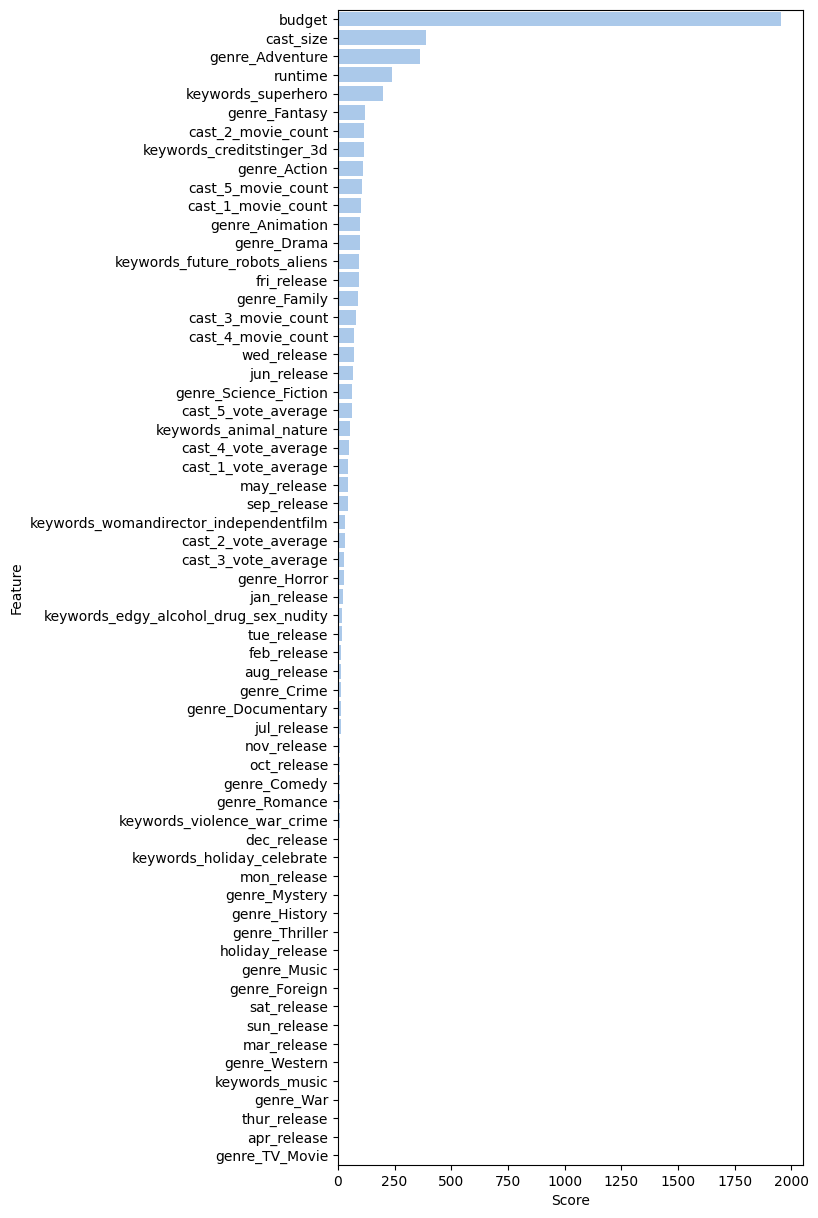

In [9]:
columns = X_train.columns
f_data_lst = []

for s in srted_feat_scores:
    idx = np.where(feat_scores == s)[0][0]
    f_data_lst.append([columns[idx],s])

feature_data = pd.DataFrame(f_data_lst, columns=['Feature','Score'])

f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Score", y="Feature", data=feature_data,
            label="Score", color="b")